In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"]=(20, 10)

# Loading the dataset

In [2]:
df= pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [4]:
df.shape

(13320, 9)

In [5]:
print(df.columns)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [8]:
print(df['area_type'].nunique())
print(df['availability'].nunique())
print(df['location'].nunique())
print(df['size'].nunique())
print(df['society'].nunique())
print(df['total_sqft'].nunique())

4
81
1305
31
2688
2117


In [9]:
df1 = df.drop(['area_type', 'availability', 'society'], axis='columns')
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
df1.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df1.iloc[:, 0:2])
df1.iloc[:, 0:2]= imputer.transform(df1.iloc[:, 0:2])

In [12]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df1.iloc[:, 3:5])
df1.iloc[:, 3:5]= imputer.transform(df1.iloc[:, 3:5])

In [13]:
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [14]:
df1.dtypes

location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

In [15]:
df1.shape

(13320, 6)

In [16]:
df1['bhk']= df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [17]:
df1.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [18]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [19]:
df1[df1['bhk']>15]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.000000,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,1.584376,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,1.584376,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,0.000000,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,1.584376,200.0,18


In [20]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df1[~df1['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.00000,0.000000,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.69261,1.584376,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.69261,1.584376,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.00000,0.000000,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.00000,0.000000,54.005,2
...,...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.00000,0.000000,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.00000,0.000000,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,2.69261,1.584376,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.00000,0.000000,59.135,2


In [23]:
def convert_sqft_num(x):
    tokens= x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
df2= df1.copy()
df2['total_sqft']= df2['total_sqft'].apply(convert_sqft_num)

In [25]:
df2.isna().sum()

location       0
size           0
total_sqft    46
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [26]:
df2= df2.dropna()

In [27]:
df2.dtypes

location       object
size           object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bhk             int64
dtype: object

In [28]:
df2.dtypes

location       object
size           object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bhk             int64
dtype: object

In [29]:
df3= df2.copy()
df3['price_per_sqft']= (df3['price']*100000)/df3['total_sqft']

In [30]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [31]:
len(df3['location'].unique())

1299

In [32]:
df3.location= df3.location.apply(lambda x: x.strip())

In [33]:
location_stats= df3.groupby('location')['location'].agg('count').sort_values(ascending= False)

In [34]:
print(location_stats)

location
Whitefield               540
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
Kanakapura Main Road       1
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
whitefiled                 1
Name: location, Length: 1288, dtype: int64


In [35]:
len(location_stats[location_stats<=10])

1048

In [36]:
location_stats_less_than_10= location_stats[location_stats<=10]

In [37]:
df3.location= df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [38]:
df3[df3.total_sqft/df3.bhk<300]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,1.584376,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,1.584376,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.000000,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.000000,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.000000,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,1.584376,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,1.584376,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.000000,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.000000,70.0,5,9043.927649


In [39]:
df4= df3[~(df3.total_sqft/df3.bhk<300)]

In [40]:
df4.shape

(12530, 8)

In [41]:
df4.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.563572,1.587513,111.382401,2.650838,6303.979357
std,1261.271296,1.077132,0.792011,152.077329,0.976678,4162.237981
min,300.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,1.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,2.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.588235


In [42]:
def remove_pps_outliers(df):
    df_out= pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df= subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
        df_out= pd.concat([df_out, reduced_df], ignore_index= True)
    return df_out
df5= remove_pps_outliers(df4)
df5.shape

(10302, 8)

In [43]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()


In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
df6.shape

(7348, 8)

Text(0, 0.5, 'Count')

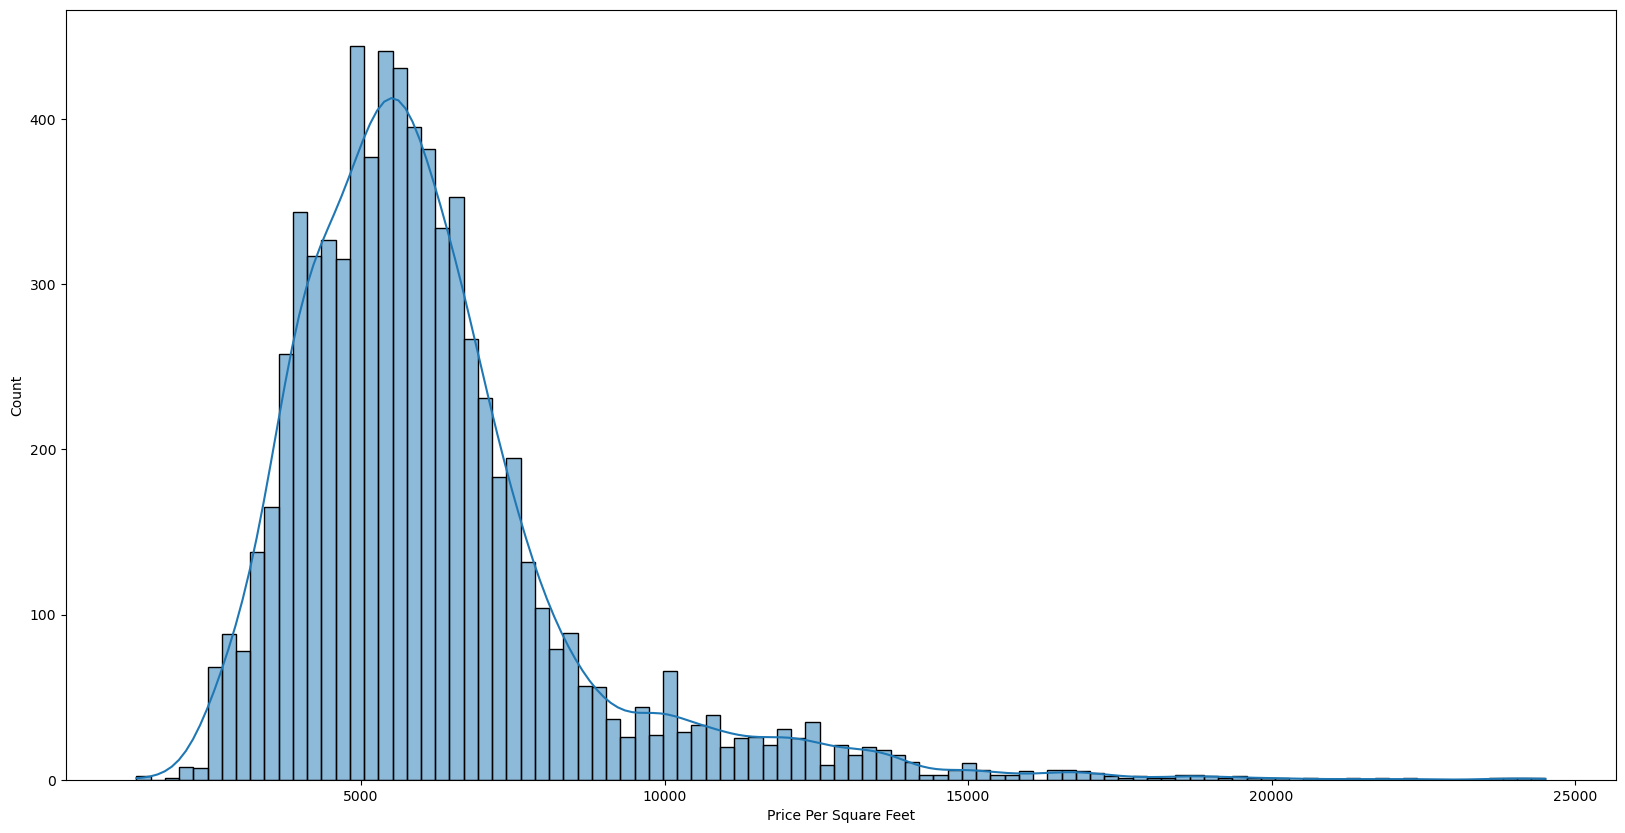

In [45]:
sns.histplot(df6.price_per_sqft,kde= True, fill=True)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [46]:
df6.bath.unique()

array([ 4.        ,  3.        ,  2.        ,  5.        ,  8.        ,
        1.        ,  6.        ,  2.69260965,  7.        ,  9.        ,
       12.        , 16.        , 13.        ])

Text(0, 0.5, 'Count')

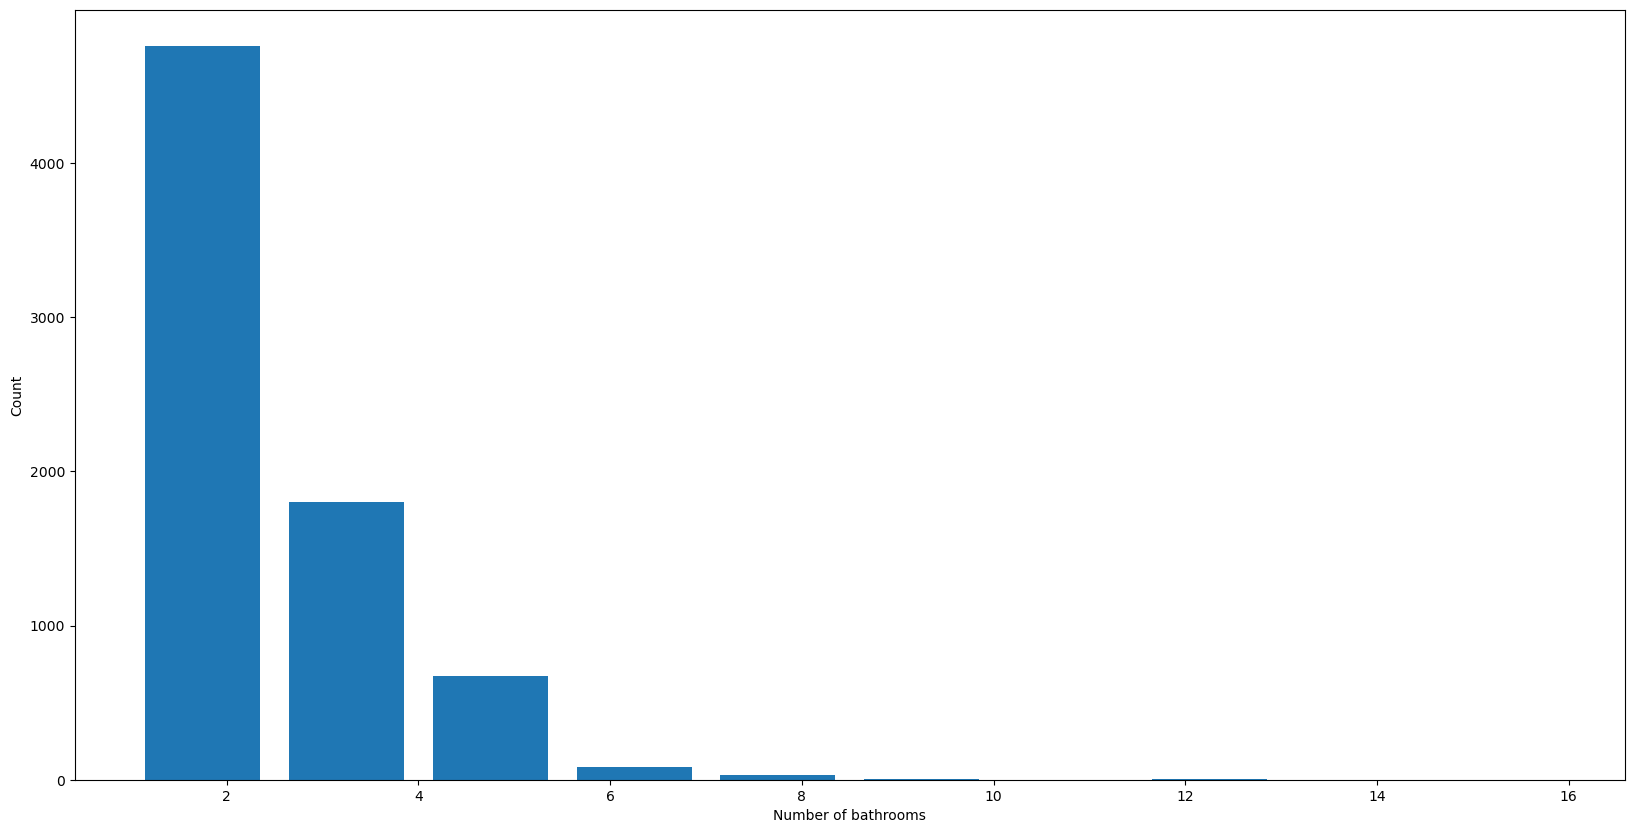

In [47]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [48]:
df6[df6.bath>10]


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
5313,Neeladri Nagar,10 BHK,4000.0,12.0,1.584376,160.0,10,4000.000000
8540,other,10 BHK,12000.0,12.0,1.584376,525.0,10,4375.000000
8629,other,16 BHK,10000.0,16.0,1.584376,550.0,16,5500.000000
9363,other,11 BHK,6000.0,12.0,1.584376,150.0,11,2500.000000
9695,other,13 BHK,5425.0,13.0,0.000000,275.0,13,5069.124424


### **It is unusual to have 2 more bathrooms than number of bedrooms in a home**

In [49]:
df6[df6.bath>df6.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,2.000000,80.0,4,3252.032520
5274,Nagasandra,4 Bedroom,7000.0,8.0,1.584376,450.0,4,6428.571429
6759,Thanisandra,3 BHK,1806.0,6.0,2.000000,116.0,3,6423.034330
8465,other,6 BHK,11338.0,9.0,1.000000,1000.0,6,8819.897689


In [50]:
df7 = df6[df6.bath<df6.bhk+2]
df7.shape

(7269, 8)

In [51]:
df8 = df7.drop(['price_per_sqft'],axis='columns')
df8.head(3)

,location,size,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3


In [52]:
dummies = pd.get_dummies(df8.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df9 = pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
df9.head()

,location,size,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
df10 = df9.drop('location',axis='columns')
df10.head(2)

,size,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4.0,1.0,428.0,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3 BHK,1630.0,3.0,2.0,194.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df10.shape

(7269, 246)

In [61]:
X = df10.drop(['price', 'size'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
X.shape

(7269, 244)

In [63]:
y = df10.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [65]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8744329366865451

In [66]:
y_pred= lr_clf.predict(X_test)

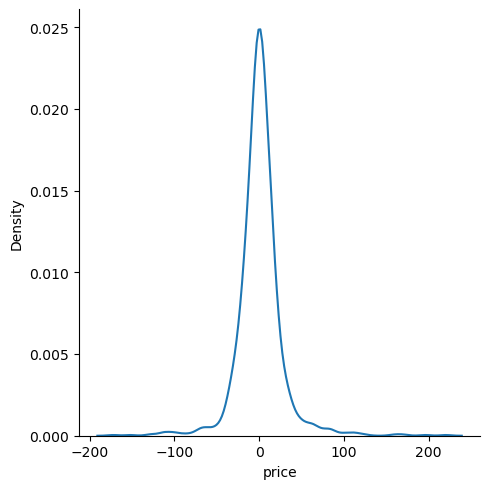

In [67]:
residuals= y_test- y_pred
sns.displot(residuals, kind= 'kde')

In [68]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82215221, 0.8581663 , 0.86286403, 0.82129283, 0.80300226])

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Squared error:- ", mean_squared_error(y_test, y_pred))
print("Mean Absolute error:- ", mean_absolute_error(y_test, y_pred))
print("R^2 Score:- ", r2_score(y_test, y_pred))
score= r2_score(y_test, y_pred)
adjusted_R2_score= 1- (1-score)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)
print("Adjusted R^2 Score:- ", adjusted_R2_score)

Mean Squared error:-  733.2404774023736
Mean Absolute error:-  16.398865832275018
R^2 Score:-  0.8744329366865451
Adjusted R^2 Score:-  0.8490910314355252


In [73]:
import pickle
with open('Price_model.pkl', 'wb') as f:
    pickle.dump(lr_clf, f)

In [74]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    json.dump(columns, f)

In [72]:
import sklearn
print(sklearn.__version__)

1.6.0
